# Others

![SegmentLocal](img/8.gif "segment")


![SegmentLocal](img/6.jpg "segment")

In [1]:
import os             
folder = "./data/Others/"
txt_files = os.listdir(folder)   # imagine you're one directory above test dir
print(txt_files)

['From Thomas Jefferson to George Washington, 9 September 1792.txt', 'Introductory Note The Duel Between Aaron Burr and Alexander Hamilton, 18 June–23 October 1804.txt', "Transcript of President George Washington's Farewell Address (1796).txt"]


In [2]:
import pandas as pd
corpus = []

for file_path in txt_files:
    with open(folder+file_path,encoding='utf8') as f_input:
        corpus.append(f_input.read())

print(corpus[0])

Dear Sir
I received on the 2d. inst the letter of Aug. 23. which you did me the honor to write me; but the immediate return of our post, contrary to his custom, prevented my answer by that occasion. The proceedings of Spain mentioned in your letter are really of a complexion to excite uneasiness, and a suspicion that their friendly overtures about the Missisipi have been merely to lull us while they should be strengthening their holds on that river. Mr. Carmichael’s silence has been long my astonishment: and however it might have1 justified something very different from a new appointment, yet the public interest certainly called for his junction with Mr. Short as it is impossible but that his knolege of the ground of negotiation of persons and characters, must be useful and even necessary to the success of the mission. That Spain and Gr. Britain may understand one another on our frontiers is very possible; for however opposite their interests or dispositions may be in the affairs of Eu

In [3]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/robotmua-640cce327819.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: From Thomas Jefferson to George Washington, 9 September 1792
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Introductory Note The Duel Between Aaron Burr and Alexander Hamilton, 18 June–23 October 1804
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Transcript of President George Washington's Farewell Address (1796)
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative




In [4]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in From Thomas Jefferson to George Washington, 9 September 1792 Letter
['Secretary', 'Freneau', 'Sir', 'Hamilton', 'Messrs. Carmichael', 'man', 'Fenno', 'agents', 'Short', 'other', 'persons', 'Pintard', 'members', 'Bache', 'characters', 'persons', 'persons', 'no one', 'others', 'agent', 'persons', 'man', 'deserters', 'Hancock', 'friends', 'mariner', 'ministers', 'members', 'countrymen', 'people', 'people', 'representatives', 'partisans', 'man', 'majority', 'character', 'friends', 'spectators', 'loan officers', 'customhouse officers', 'President', 'friends', 'friends', 'actors', 'clerks', 'clerk', 'clerk', 'clerk', 'clerk', 'other', 'man', 'no one', 'friends', 'members', 'gazette', 'person', 'representatives', 'representatives', 'corps', 'public', 'corps', 'public', 'king', 'king', 'cabals', 'ministers', 'author', 'French.', 'accuser', 'sons', 'Which', 'no one', 'servants', 'forwards', 'millions', 'writer', 'family', 'family', 'Sir', 'alias', 'Elsworth', 'servant',

In [5]:
types1 = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [7]:
import plotly.graph_objects as go

#print(sentiment_analysis)

#print(list(sentiment_analysis.values))
fig = go.Figure(data=[go.Pie(labels=types1, values=total_num, title="Pie Chart of Entity Analysis of Others")])
fig.show()

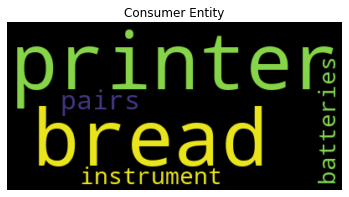

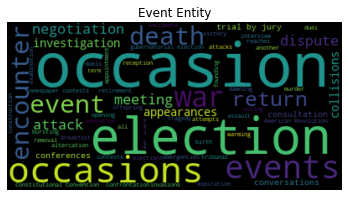

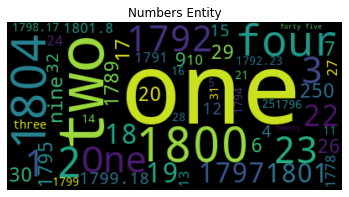

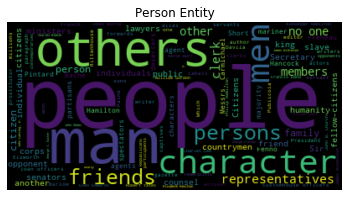

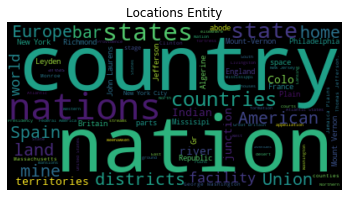

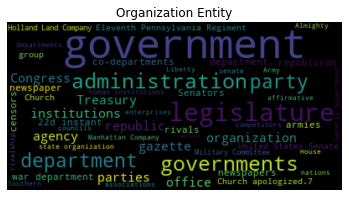

In [8]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
a = []
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    
    
    
    for j in range(len(response2.tokens)):
        a.append((response2.tokens[j].part_of_speech))
    #    print('Syntax: {}'.format(response2[j]))    
    #print('Sentiment: {}'.format(response1))
    
    #print('Sentiment: {}'.format(response3))
print(a)

[tag: ADJ
, tag: NOUN
number: SINGULAR
, tag: PRON
case: NOMINATIVE
number: SINGULAR
person: FIRST
, tag: VERB
mood: INDICATIVE
tense: PAST
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: VERB
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: NUM
, tag: PUNCT
, tag: DET
, tag: PRON
case: NOMINATIVE
person: SECOND
, tag: VERB
mood: INDICATIVE
tense: PAST
, tag: PRON
case: ACCUSATIVE
number: SINGULAR
person: FIRST
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: PRT
, tag: VERB
, tag: PRON
case: ACCUSATIVE
number: SINGULAR
person: FIRST
, tag: PUNCT
, tag: CONJ
, tag: DET
, tag: ADJ
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: PRON
case: GENITIVE
number: PLURAL
person: FIRST
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: ADJ
, tag: ADP
, tag: PRON
case: GENITIVE
gender: MASCULINE
number: SINGULAR
person: THIRD
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: VERB
mood: INDICATIVE
tense: PAST
, tag: PRON
case: GE

In [10]:
from google.cloud.language import types
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)
    
    for j in range(len(response3.categories)):
        print('Classification of Letter '+ txt_files[i][:-4] )
        print((response3.categories[j].name))
        print("")
        print("")
    #print((response3.categories))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
   # answer = ''
   # if response3 == '':
    #    answer='No Classification Determined'
    
    #else:
    #    answer = response3.name
    #print('Classification: {}'.format(answer))

Classification of Letter From Thomas Jefferson to George Washington, 9 September 1792
/People & Society


Classification of Letter From Thomas Jefferson to George Washington, 9 September 1792
/Reference


Classification of Letter Introductory Note The Duel Between Aaron Burr and Alexander Hamilton, 18 June–23 October 1804
/News/Politics


Classification of Letter Transcript of President George Washington's Farewell Address (1796)
/People & Society


